CASO 2

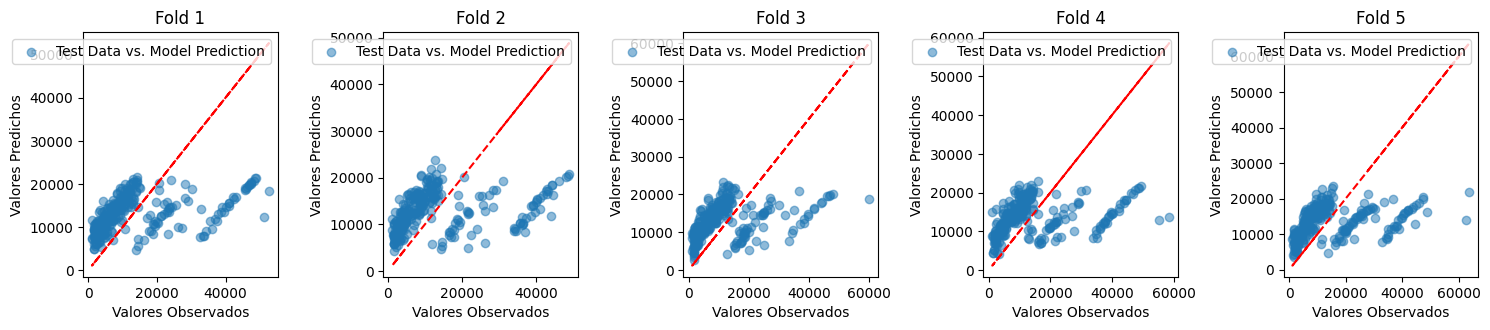

MSE promedio para K-Fold CV: 128957636.62983021
MSE de cada pliegue: [131848314.31356637, 137051422.3278678, 98716685.01081058, 139905759.96920913, 137266001.52769712]


In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Cargar los datos
df = pd.read_csv('insurance.csv')

# Mapear la variable 'smoker' a valores numéricos
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Definir variables independientes (X) y dependiente (y)
X = df[['age', 'bmi', 'children','smoker']]
y = df['charges']

# Añadir la columna de constante a X para el término independiente
X = sm.add_constant(X)

# Inicializar el modelo de regresión lineal
modelo = sm.OLS(y, X)

# Método 1: K-Fold Cross-Validation
k = 5  # Número de pliegues
kf = KFold(n_splits=k, shuffle=True, random_state=0)

# Lista para almacenar los MSE de cada pliegue
mse_scores = []

# Crear una figura para K-Fold
plt.figure(figsize=(15, 6))

fold = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Ajustar el modelo en el conjunto de entrenamiento
    modelo_fitted = modelo.fit()

    # Predecir sobre el conjunto de prueba
    y_pred = modelo_fitted.predict(X_test)

    # Calcular el Error Cuadrático Medio (MSE) para este pliegue
    mse = np.mean((y_test - y_pred) ** 2)
    mse_scores.append(mse)

    # Visualizar el ajuste del modelo para cada pliegue
    plt.subplot(2, k, fold)
    plt.scatter(y_test, y_pred, label='Test Data vs. Model Prediction', alpha=0.5)
    plt.plot(y_test, y_test, color='red', linestyle='--')  # Línea de identidad
    plt.title(f'Fold {fold}')
    plt.xlabel('Valores Observados')
    plt.ylabel('Valores Predichos')
    plt.legend()
    fold += 1

# Calcular el MSE promedio
mean_mse = np.mean(mse_scores)

# Ajustar los espacios entre las gráficas para que se vean mejor
plt.tight_layout()

# Mostrar los resultados
plt.show()

# Mostrar el MSE promedio
print(f"MSE promedio para K-Fold CV: {mean_mse}")
print("MSE de cada pliegue:", mse_scores)

#k=3, 36680455.99149378
#K=5, 36686587.6234814
#k=10,36692305.93968387
#k=15,36691072.50789375
#k=20,36701485.92775258

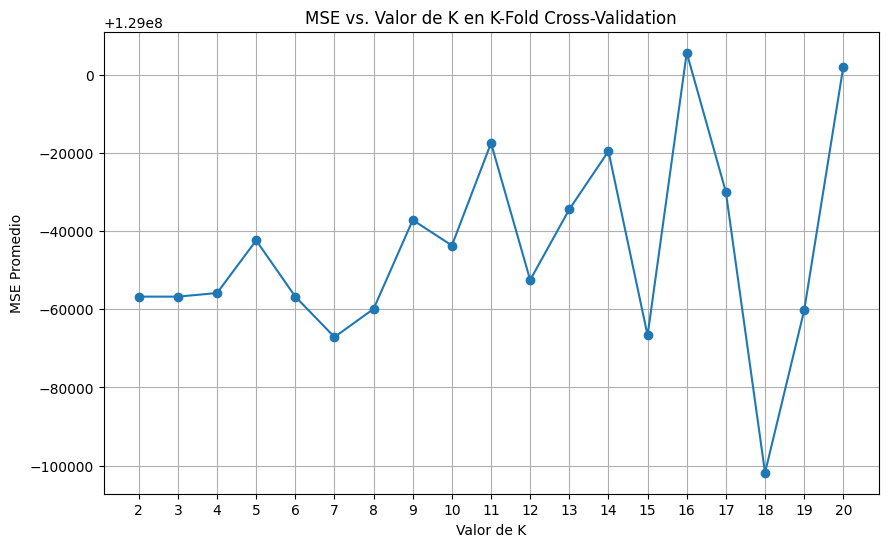

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Cargar los datos
df = pd.read_csv('insurance.csv')

# Mapear la variable 'smoker' a valores numéricos
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Definir variables independientes (X) y dependiente (y)
X = df[['age', 'bmi', 'children', 'smoker']]
y = df['charges']

# Añadir la columna de constante a X para el término independiente
X = sm.add_constant(X)

# Inicializar el modelo de regresión lineal
modelo = sm.OLS(y, X)

# Definir una lista para almacenar los MSE de cada iteración
mse_values = []

# Definir una lista para almacenar los valores de K
k_values = range(2, 21)  # Rango de valores de K que quieres probar

# Realizar la validación cruzada para diferentes valores de K
for k in k_values:
    # Inicializar K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=0)
    
    # Lista para almacenar los MSE de cada pliegue
    mse_scores = []
    
    # Realizar la validación cruzada
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Ajustar el modelo en el conjunto de entrenamiento
        modelo_fitted = modelo.fit()

        # Predecir sobre el conjunto de prueba
        y_pred = modelo_fitted.predict(X_test)

        # Calcular el Error Cuadrático Medio (MSE) para este pliegue
        mse = np.mean((y_test - y_pred) ** 2)
        mse_scores.append(mse)
    
    # Calcular el MSE promedio para este valor de K
    mean_mse = np.mean(mse_scores)
    
    # Almacenar el MSE promedio en la lista de valores de MSE
    mse_values.append(mean_mse)

# Graficar los valores de MSE en función de los valores de K
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.title('MSE vs. Valor de K en K-Fold Cross-Validation')
plt.xlabel('Valor de K')
plt.ylabel('MSE Promedio')
plt.xticks(k_values)
plt.grid(True)
plt.show()

BONOOOOO

In [40]:
import numpy as np

# Supongamos que tienes tus datos en un DataFrame de pandas llamado 'df'
# Asegúrate de que 'df' contiene tus características (X) y la variable objetivo (y)

# Seleccionar las primeras 100 observaciones de la base de datos
subset_data = df.head(100)

# Extraer la variable objetivo (y) de las primeras 100 observaciones
data = subset_data['charges'].values

# Número de muestras Bootstrap a generar
num_bootstrap_samples = 5000

# Tamaño de la muestra Bootstrap (igual al tamaño de los datos originales)
bootstrap_sample_size = len(data)

# Lista para almacenar las medias de las muestras Bootstrap
bootstrap_means = []

# Realizar muestras Bootstrap y calcular las medias
for _ in range(num_bootstrap_samples):
    # Generar una muestra Bootstrap (con reemplazo)
    bootstrap_sample = np.random.choice(data, size=bootstrap_sample_size, replace=True)
    # Calcular la media de la muestra Bootstrap y añadirla a la lista
    bootstrap_means.append(np.mean(bootstrap_sample))

# Calcular el intervalo de confianza del 95% para la media utilizando percentiles
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print("Intervalo de confianza del 95% para la media:", (lower_bound, upper_bound))

Intervalo de confianza del 95% para la media: (12039.276317635, 17276.636974562498)


Se quiso hacer uso de boostraps con un total de muestras de 5000 para poder estimar la verdadera media de la variable dependiente 'charges' y se halló que con un 95% de confianza se encuentra entre el intervalo de (12039.27-17276.63). Esto nos ayuda a poder inferir la media poblacional real para la variable charges.

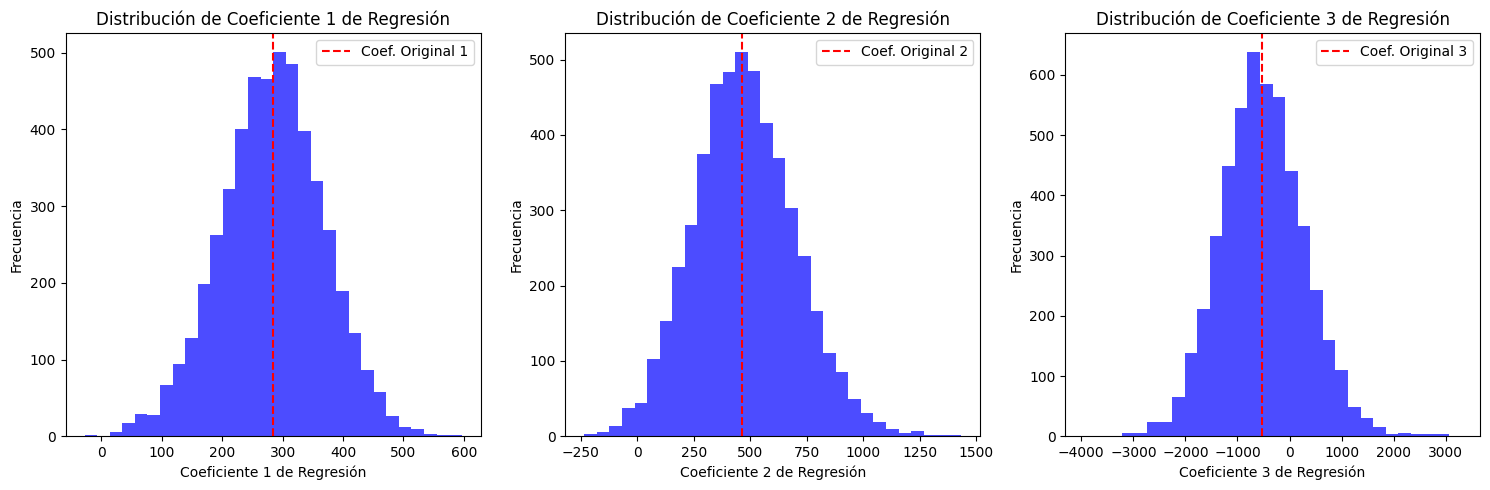

Resultados de los coeficientes Bootstrap:
Coeficiente 1: Media = 283.0739, Desviación Estándar = 85.1816
Coeficiente 2: Media = 474.1855, Desviación Estándar = 224.3660
Coeficiente 3: Media = -513.9129, Desviación Estándar = 804.7487


In [98]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Supongamos que tienes tus datos en un DataFrame de pandas llamado 'df'
# Asegúrate de que 'df' contiene tus características (X) y la variable objetivo (y)

# Seleccionar las primeras 100 observaciones de la base de datos original
subset_data = df.head(100)

# Extraer las características y la variable objetivo de las primeras 100 observaciones
X_subset = subset_data[['age', 'bmi', 'children']]
y_subset = subset_data['charges']

# Ajustar un modelo de regresión lineal múltiple a los datos originales
model = LinearRegression()
model.fit(X_subset, y_subset)
coef_originales = model.coef_
intercept_original = model.intercept_

# Aplicar Bootstrap para estimar los coeficientes de regresión múltiple
num_bootstrap_samples = 5000  # Número de muestras Bootstrap 
bootstrap_coefs = []
bootstrap_intercept = []

for _ in range(num_bootstrap_samples):
    # Generar una muestra bootstrap
    bootstrap_data = subset_data.sample(frac=1, replace=True)  # Mezclar y tomar muestras con reemplazo
    X_bootstrap = bootstrap_data[['age', 'bmi', 'children']]
    y_bootstrap = bootstrap_data['charges']

    # Ajustar un modelo de regresión lineal múltiple a la muestra bootstrap
    model.fit(X_bootstrap, y_bootstrap)
    bootstrap_coefs.append(model.coef_)
    bootstrap_intercept.append(model.intercept_)

# Visualizar las distribuciones de los coeficientes de regresión múltiple
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    bootstrap_coefs_i = [coef[i] for coef in bootstrap_coefs]
    plt.hist(bootstrap_coefs_i, bins=30, color='blue', alpha=0.7)
    plt.axvline(x=coef_originales[i], color='red', linestyle='--', label=f'Coef. Original {i + 1}')
    plt.xlabel(f'Coeficiente {i + 1} de Regresión')
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de Coeficiente {i + 1} de Regresión')
    plt.legend()

plt.tight_layout()
plt.show()

# Imprimir los resultados de los coeficientes Bootstrap
print("Resultados de los coeficientes Bootstrap:")
for i, coef_name in enumerate(['Coeficiente 1', 'Coeficiente 2', 'Coeficiente 3']):
    bootstrap_coefs_i = [coef[i] for coef in bootstrap_coefs]
    mean_coef_bootstrap = np.mean(bootstrap_coefs_i)
    std_coef_bootstrap = np.std(bootstrap_coefs_i)
    print(f"{coef_name}: Media = {mean_coef_bootstrap:.4f}, Desviación Estándar = {std_coef_bootstrap:.4f}")


Para este apartado se quiso conocer el coeficiente y las desviaciones estándar de las 3 variables independientes, estas son age, bmi, children. 